In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
np.set_printoptions(precision=5,suppress=True)
font = {
#     'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
filepath = "training(1).csv" 
data = pd.read_csv(filepath,',',error_bad_lines=False)
data = data.dropna()
print(len(data))

669423


In [8]:
for strength in range(3):
    print(data[data.strength==strength].sample(2))

         index password  strength
359319  359456  wewes19         0
142007  142069  asdas95         0
         index    password  strength
530443  530640    oyeleye1         1
425288  425448  80188063JA         1
         index          password  strength
271676  271787  JFRTgxTQyNQTh9ZD         2
183959  184033  d7a6AoTMxMw0dLVy         2


max length = 220
max length = 1


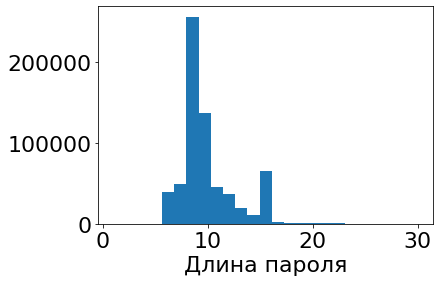

In [9]:
MAX_LENGTH = max(map(len, data.password))
MIN_LENGTH = min(map(len, data.password))
print("max length =", MAX_LENGTH)
print("max length =", MIN_LENGTH)

n, bins, patches =  plt.hist(list(map(len, data.password)),bins=25, range=(MIN_LENGTH, 30) );
plt.xlabel('Длина пароля')
plt.show()

In [3]:
import seaborn as sns

In [4]:
all_letters = list(set(''.join(data.password)))
n_letters = len(all_letters)
vocab = ['<pad>'] + all_letters
vocab_size = len(vocab)
letter_id_dict = {k:v for (v,k) in enumerate(vocab)}
print ('n_letters = ', n_letters)
print('vocab_size=',  vocab_size)

n_letters =  200
vocab_size= 201


In [5]:
string = ''.join(data.password[data.strength==0].values)
string.count('a')

46336

In [ ]:
import pickle
with open('letter_id_dict.pkl', 'wb') as f:
    pickle.dump(letter_id_dict, f)

In [ ]:
data = data.sample(frac=1)
train_data, test_data = train_test_split(data, 
                                         stratify=data.strength, 
                                         test_size=0.2)

In [ ]:
print(len(train_data), len(test_data))

In [ ]:
print(np.unique(train_data.strength.values, return_counts=True)[1]/len(train_data),
      np.unique(test_data.strength.values, return_counts=True)[1]/len(test_data))

In [ ]:
train_data.to_pickle('train_data.pkl') 
test_data.to_pickle('test_data.pkl') 

In [6]:
data['len'] = data.password.apply(len)

Text(0, 0.5, 'Длина пароля')

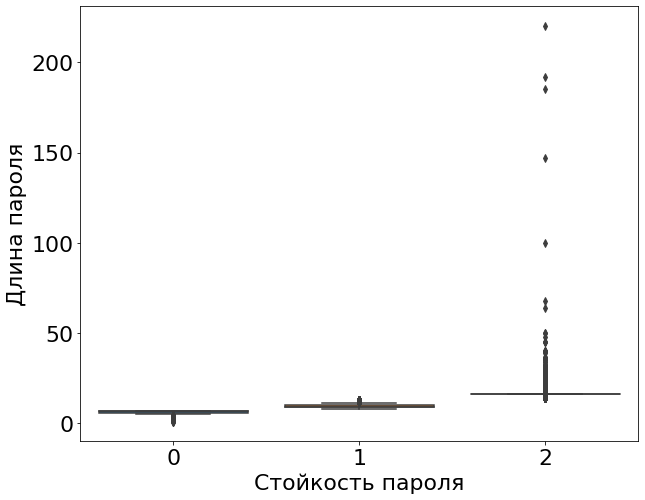

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="strength", 
            y="len", 
            data=data)
plt.xlabel("Стойкость пароля", size=22)
plt.ylabel("Длина пароля", size=22)